<a href="https://colab.research.google.com/github/AdemolaAri/machineLearning/blob/master/Reg_Linear_Regression_housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center>Linear Regression: Python</center></h1>


<h2>About this Notebook</h2>

In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a Real Estate Evaluation dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set). Then, we split our data into training and validation sets, create a model using training set, evaluate your model using validation set and use model to predict unknown value.



<h2 id="understanding_data">Understanding the Data</h2>

Refer to this page for more information about the dataset [UCI Machine Learning Repository - Real Estate Evaluation](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

Attribute Information:

The inputs are as follows <br>
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) <br>
X2=the house age (unit: year) <br>
X3=the distance to the nearest MRT station (unit: meter) <br>
X4=the number of convenience stores in the living circle on foot (integer) <br>
X5=the geographic coordinate, latitude. (unit: degree) <br>
X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow <br>
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

### Download the Dataset


In [0]:
!wget -O housePrice.xlsx https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx

--2019-09-06 23:30:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32717 (32K) [application/x-httpd-php]
Saving to: ‘housePrice.xlsx’

housePrice.xlsx     100%[===================>]  31.95K  --.-KB/s    in 0.07s   

2019-09-06 23:30:34 (434 KB/s) - ‘housePrice.xlsx’ saved [32717/32717]



In [0]:
import pandas as pd
df = pd.read_excel('housePrice.xlsx')
df.columns = ['ID', 'date', 'age', 'dis_to_station', 'num_stores', 'lat', 'long', 'price']
df.head()

,ID,date,age,dis_to_station,num_stores,lat,long,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


<h2 id="data_exploration">Data Exploration</h2>
Lets select some features and have a descriptive exploration on our data.

In [0]:
# summarize the data
train_df = df[['age', 'dis_to_station', 'num_stores', 'price']]
train_df.describe()

,age,dis_to_station,num_stores,price
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


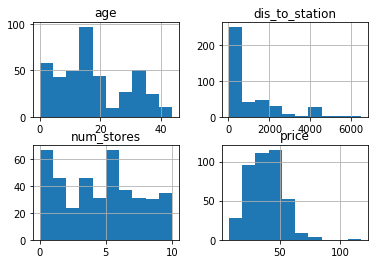

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
train_df.hist()
plt.show()

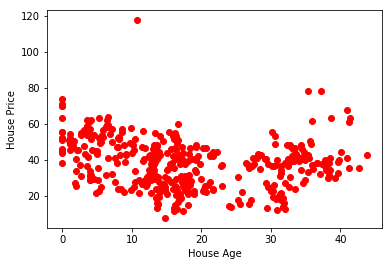

In [0]:
plt.scatter(train_df.age, train_df.price, color='red')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

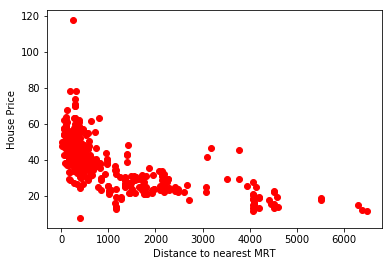

In [0]:
plt.scatter(train_df.dis_to_station, train_df.price, color='red')
plt.xlabel('Distance to nearest MRT')
plt.ylabel('House Price')
plt.show()

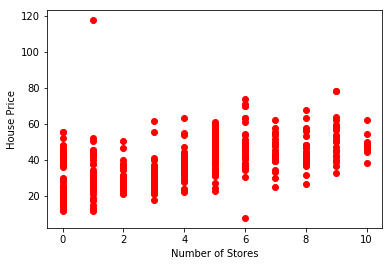

In [0]:
plt.scatter(train_df.num_stores, train_df.price, color='red')
plt.xlabel('Number of Stores')
plt.ylabel('House Price')
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [0]:
import numpy as np

mask = np.random.rand(len(df)) < 0.8
train = train_df[mask]
val = train_df[~mask]


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. We will use the <b> distance to MRT station </b> to predict the <b> House Price </b>

#### Modeling
Using sklearn package to model data.

In [0]:
from sklearn import linear_model

x_train = np.asanyarray(train[['dis_to_station']])
y_train = np.asanyarray(train['price'])

modelSimpRgr = linear_model.LinearRegression()
modelSimpRgr.fit(x_train, y_train)
# The coefficients
print ('Coefficients: ', modelSimpRgr.coef_)
print ('Intercept: ',modelSimpRgr.intercept_)

Coefficients:  [-0.00764177]
Intercept:  46.31366304936584


#### Plot outputs

Text(0, 0.5, 'House Price')

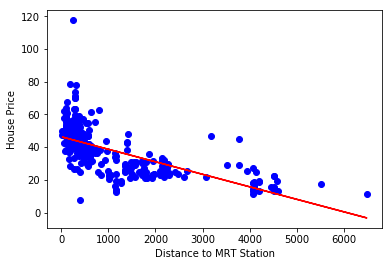

In [0]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, modelSimpRgr.coef_[0]*x_train + modelSimpRgr.intercept_, '-r')
plt.xlabel("Distance to MRT Station")
plt.ylabel("House Price")

From the regression coefficient and the regression line above, we can deduce that there is a negative relationship between distance to MRT Station and House price i.e. the farther the distance of a particular house to the MRT station, the lower the price of that house, citeris paribus.

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [0]:
from sklearn.metrics import r2_score

x_validation = np.asanyarray(val[['dis_to_station']])
y_validation = np.asanyarray(val['price'])
y_predicted = modelSimpRgr.predict(x_validation)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_validation)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_validation) ** 2))
print("R2-score: %.2f" % r2_score(y_predicted , y_validation) )

Mean absolute error: 7.03
Residual sum of squares (MSE): 72.06
R2-score: 0.39


<br>


<h2 id="multiple_regression_model">Multiple Regression Model</h2>

In reality, there are multiple variables that predict the price of a house. We can easily conduct a multiple regression model using the same steps as we used for the simple regression model.

#### Modeling
Using sklearn package to model data.

In [0]:
from sklearn import linear_model
modelMtplRgr = linear_model.LinearRegression()

x_train2 = np.asanyarray(train.iloc[:, :-1])
y_train2 = np.asanyarray(train['price'])

modelMtplRgr.fit (x_train2, y_train2)
# The coefficients
print('Multiple Regression Model', '\n')
print ('Coefficients: ', modelMtplRgr.coef_)
print ('Intercept: ',modelMtplRgr.intercept_)

Multiple Regression Model 

Coefficients:  [-0.24904367 -0.00573767  1.29553787]
Intercept:  43.44841505415558


####Evalution

In [0]:
x_val2 = np.asanyarray(val.iloc[:, :-1])
y_val2 = np.asanyarray(val['price'])

y_pred2= modelMtplRgr.predict(x_val2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred2 - y_val2)))
print("Residual sum of squares: %.2f" % np.mean((y_pred2 - y_val2) ** 2))
#print('Variance score: %.2f' % modelMtplRgr.score(x_val2, y_val2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_val2) )

Mean absolute error: 5.94
Residual sum of squares: 54.09
R2-score: 0.59


Improves our model very slightly.

Thank you for reading!

<h4>Author:  <a href="https://www.linkedin.com/in/ademolabuwo">Ademola Arigbabuwo</a></h4>